In [1]:
cd /home/nakedmoleratvoices/Mole\ rats\ reborn/CodeRefactoredFinal/

/home/nakedmoleratvoices/Mole rats reborn/CodeRefactoredFinal


In [2]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from src.preprocessing.process_sounds_metadata import generate_sounds_metadata, make_fixed_size_sounds
from src.preprocessing.filters import filter_recs_metadata
from src.preprocessing.load_data import load_recs_dict, load_sounds
from src.deep_learning.splitting import split_recording
from src.util import make_image
import tensorflow as tf
%matplotlib inline


In [3]:
path_to_recordings_metadata = '/home/nakedmoleratvoices/Mole rats reborn/CodeRefactoredFinal/data/'
recordings_metadata_name = 'recordings_metadata.csv'

# what data to load
dates = 'all'
colonies = 'all'
experiments = 'all'
stages = ['fresh', 'split', 'split and checked',]

path_to_model = './models/splitter/deep_splitter/80x1024.ckpt'
resolution = 1024
step_size = 256
filtering_th = 3000
n_fft = 1024
n_mel = 80

In [4]:
# load metadata
recs_metadata = pd.read_csv(path_to_recordings_metadata + recordings_metadata_name)
test_recs_mask = filter_recs_metadata(recs_metadata, dates, colonies, stages, experiments)
test_recs_metadata = recs_metadata[test_recs_mask]
model = tf.keras.models.load_model(path_to_model)

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/expressions.py:193: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


In [48]:
rec_ind = -25 # change this to change rec
rec_ind = np.random.randint(0, len(test_recs_metadata))

th = 0.75

rec_name = test_recs_metadata['name'].iloc[rec_ind]
rec_path = test_recs_metadata['path'].iloc[rec_ind]
rec = np.load(rec_path + rec_name)

print(rec_name)
df_txt, img, rec_labels, img_labels = split_recording(rec, model, th, n_fft, n_mel, 
                                                      resolution, step_size, filtering_th)



baratheon_21-06-19_9449_0000001.npy


In [49]:
img.shape

(128, 63901)

In [50]:
df_txt.head(5)

,s,e,cl
0,3.591583,3.671735,sound
1,4.357749,4.467793,sound
2,4.785964,4.890882,sound
3,10.445322,10.624855,sound
4,13.052864,13.205570,sound


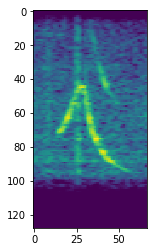

In [58]:
# show random splits
sec_to_px = 22050 / (len(rec) / img.shape[1])
i = np.random.randint(0, len(df_txt))

s_sec, e_sec = df_txt[['s', 'e']].iloc[i]
s_smp, e_smp = int(22050 * s_sec), int(22050 * e_sec)
s_px, e_px = int(sec_to_px * s_sec), int(sec_to_px * e_sec)

plt.imshow(img[:, s_px : e_px])

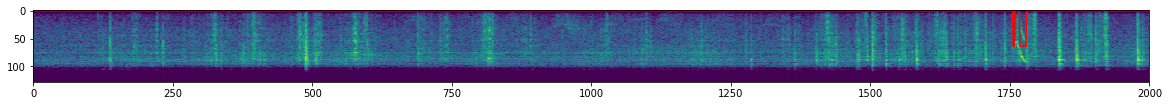

In [65]:
# show big spec with splits
plt.figure(figsize = (20, 20))
th = 0.75

start = np.random.randint(0, img.shape[1] - 4000)
end = start + 2000

plt.imshow(img[:, start : end])
plt.plot(64 * (img_labels[start : end] >= th), c = 'red')

In [73]:
from collections import defaultdict
counts = defaultdict(lambda : 0)
lanrecs = recs_metadata[recs_metadata['colony'] == 'lannister']
for rn, rp in lanrecs[['name', 'path']].values:
    df = pd.read_csv(rp + rn[:-3] + 'txt', sep = '\t')
    cl_counts = dict(df['cl'].value_counts())
    if 'sound' in cl_counts:
        print(rn)
        break
    for cl in cl_counts:
        counts[cl] += 1

lannister_18-08-18_4195_0000025.npy
